## Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

## load audio

In [2]:
audio1 = 'audio/audio1.wav'
audio2 = 'audio/audio3.wav'

In [3]:
#we dont need sr this time
audio1, sr = librosa.load(audio1)
audio2, sr1 = librosa.load(audio2)

# Root Mean Square Root Energy

## extract RMSE with librosa

In [4]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

In [21]:
# Compute root-mean-square (RMS) value for each frame, either from the audio samples y 
# or from a spectrogram S.
rms_audio1 = librosa.feature.rms(y = audio1, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_audio2 = librosa.feature.rms(y = audio2, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

## manual RMSE function

In [9]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

In [ ]:
def rms(y , frame_length, hop_length):
    # y = signal
    rms = []
    
    for i in range(0, len(y), hop_length):
        rms_current_frame = np.sqrt(np.sum(y[i:i+frame_length]**2) / frame_length)
        rms.append(rms_current_frame)
        
    return np.array(rms)
        

In [18]:
rms_audio1 = rms(y = audio1, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms_audio2 = rms(y = audio2, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)

## display the RMS

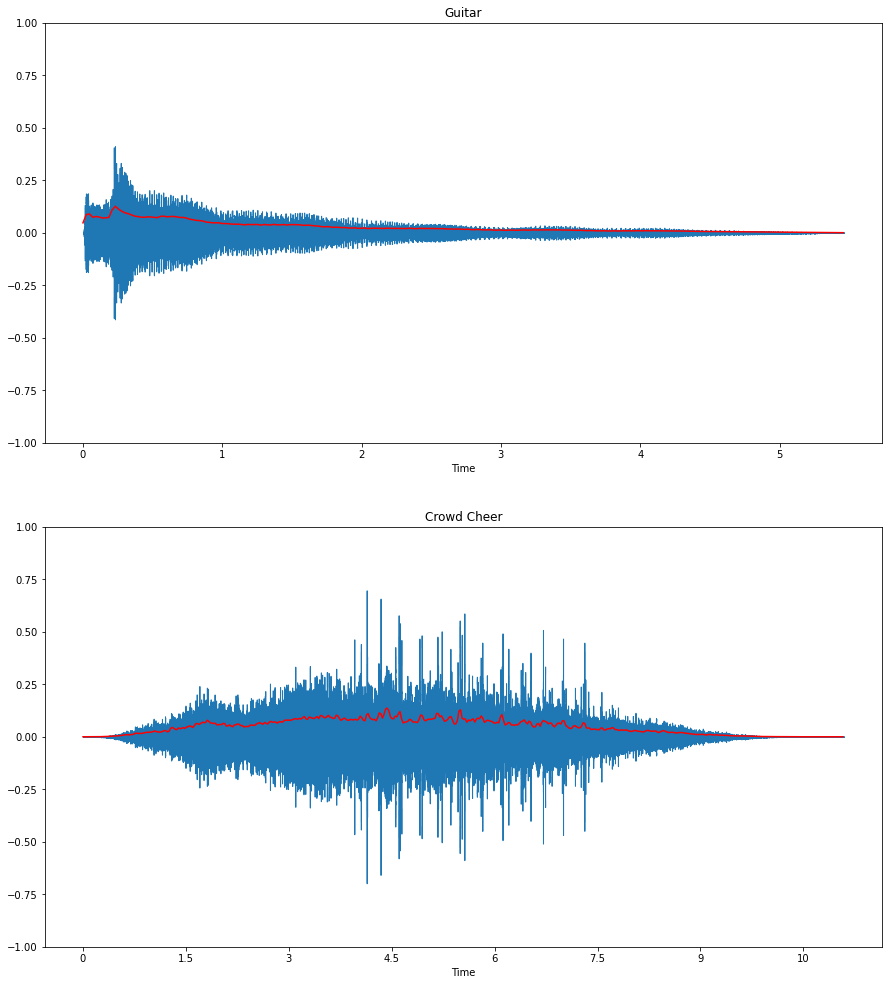

In [25]:
frames1 = range(len(rms_audio1))
frames2 = range(len(rms_audio2))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

ax = plt.subplot(2,1,1)
librosa.display.waveshow(audio1) 
plt.plot(t1, rms_audio1, color="r")
plt.title("Guitar")
plt.ylim((-1, 1))


ax = plt.subplot(2,1,2)
librosa.display.waveshow(audio2) 
plt.plot(t2, rms_audio2, color="r")
plt.title("Crowd Cheer")
plt.ylim((-1, 1))


plt.show()

# ZCR

## extract ZCR using librosa

In [26]:
zcr_audio1 = librosa.feature.zero_crossing_rate(y = audio1, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_audio2 = librosa.feature.zero_crossing_rate(y = audio2, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

## Visualize ZCR

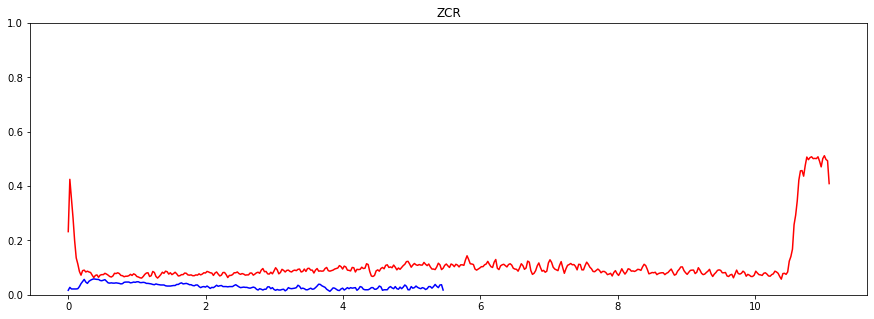

In [30]:
frames1 = range(len(rms_audio1))
frames2 = range(len(rms_audio2))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 5))
plt.plot(t1, zcr_audio1, color="b") # zcr_audio1 * FRAME_LENGTH
plt.plot(t2, zcr_audio2 , color="r")
plt.ylim((0,1))
plt.title("ZCR")

plt.show()